#### Imports

In [10]:
import numpy as np
import scipy.stats
import statsmodels.stats.power
import matplotlib.pyplot as plt

#### Which p-values can you expect?

In [11]:
n_sims = 100000                     # Number of simulations

sample_size = 51                    # Sample size of the data for testing the hypotheses
sample_mean = 106                   # Sample mean
sample_sd = 15                      # Sample standard deviation

alpha = 0.05                        # level of significance

p_values_array = np.array([])       # list to store the p-values 

for i in range(n_sims):
    x = np.random.normal(loc = sample_mean, scale = sample_sd, size = sample_size) # simulated dataset
    z = scipy.stats.ttest_1samp(x, popmean = 100) # performing the one-sample t-test
    p_values_array = np.append(p_values_array,z.pvalue) # getting the p-value and storing it

# Empirical Calculation of Statistical Power 
print('Empirical Calculation of Statistical Power: {0:1f}'.format(np.sum(p_values_array < alpha)/ n_sims))

# Formal Calculation of Statistical Power
print('Formal Calculation of Statistical Power: ' + str(statsmodels.stats.power.TTestPower().power(effect_size = (sample_mean -100)/sample_sd, nobs = sample_size, alpha = alpha)))

Empirical Calculation of Statistical Power: 0.800620
Formal Calculation of Statistical Power: 0.7999244241018141
Wall time: 18.5 s


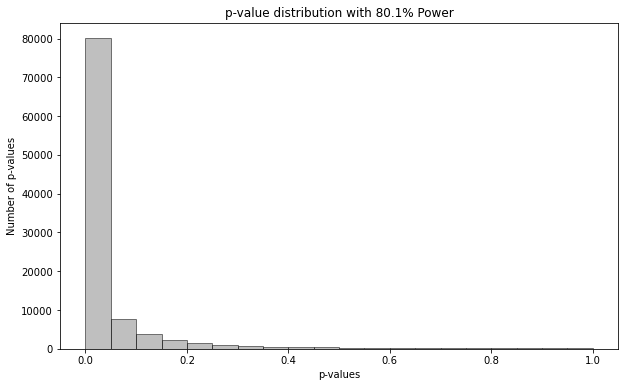

In [4]:
# Histogram
plt.figure(figsize = (10,6))
plt.hist(p_values_array, bins = 20, range = (0, 1), edgecolor = 'black', color = 'grey', alpha = 0.5)
plt.title('p-value distribution with {0:.1f}% Power'.format((np.sum(p_values_array < 0.05)*100/ n_sims)))
plt.ylabel('Number of p-values')
plt.xlabel('p-values')
# plt.xlim([0.04,0.05])
# plt.ylim([0,10000])
plt.show()